# Credit Card Fraud Detection

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'D:\data science\data set\creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [3]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df.duplicated().sum()

1081

In [6]:
duplicates = df[df.duplicated()]
distribution = duplicates['Class'].value_counts()
print(distribution)

0    1062
1      19
Name: Class, dtype: int64


In [7]:
df1 = df.drop_duplicates()
df1

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [9]:
df1.duplicated().sum()

0

In [10]:
df1.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


In [11]:
Legit = df1[df1.Class == 0]
Fraud = df1[df1.Class == 1]

In [12]:
Fraud.value_counts().sum()

473

In [13]:
Legit = Legit.sample(n=473)
Legit.value_counts().sum()

473

In [15]:
Bal_data = pd.concat([Legit,Fraud], axis = 0)
Bal_data["Class"].value_counts()

0    473
1    473
Name: Class, dtype: int64

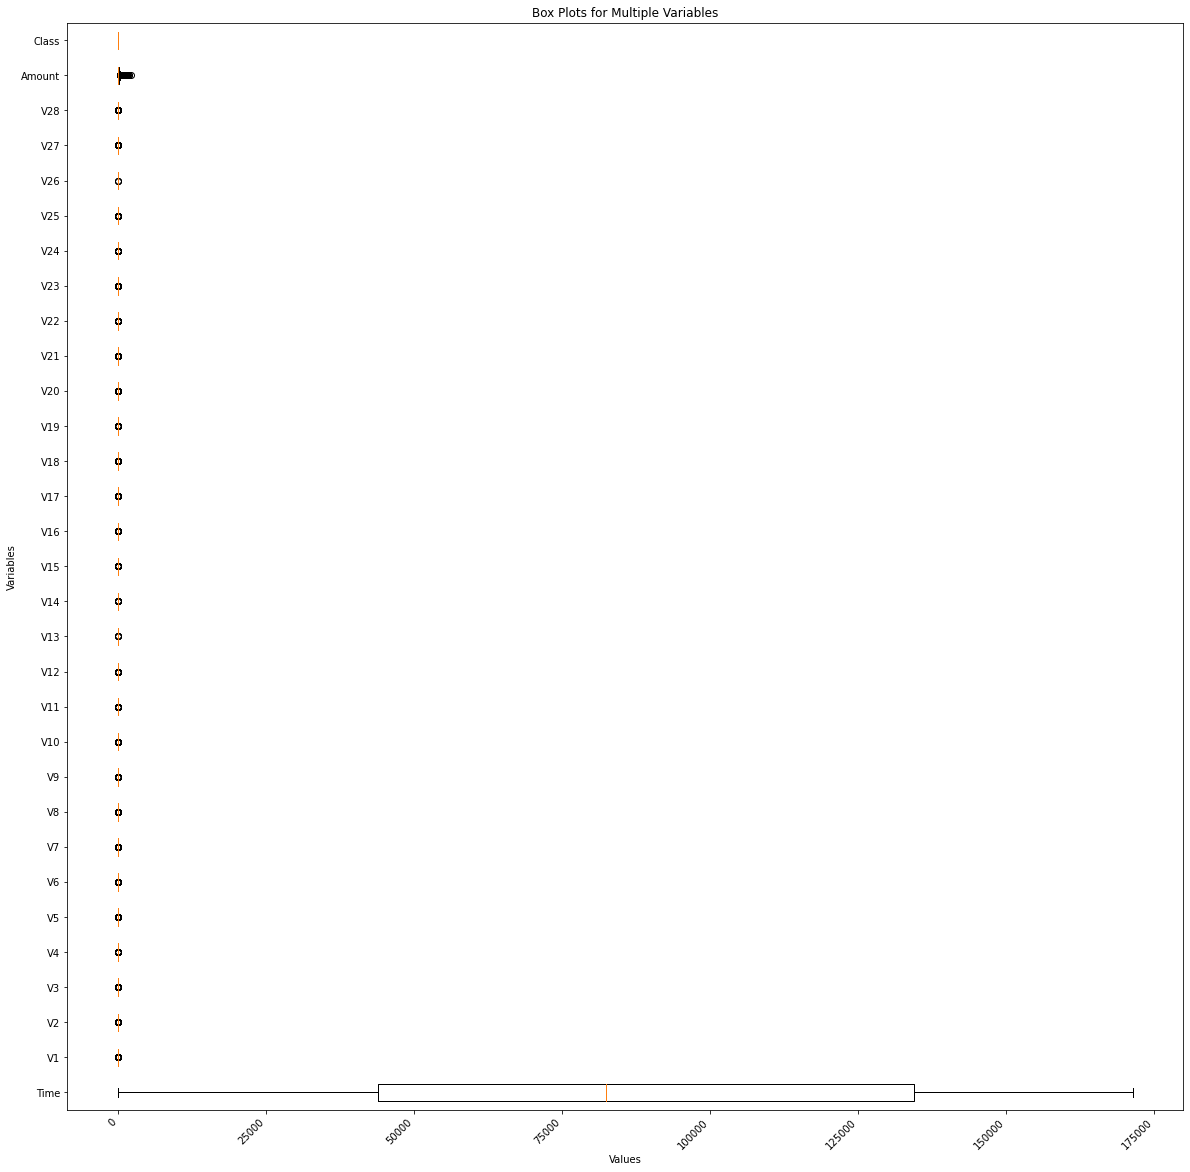

In [16]:
fig, ax = plt.subplots(figsize=(20, 20))
boxplot = ax.boxplot(Bal_data.values, vert=False, labels=df1.columns)
plt.xticks(rotation=45, ha='right')
plt.title('Box Plots for Multiple Variables')
plt.xlabel('Values')
plt.ylabel('Variables')
plt.show()

In [17]:
def identify_outliers_zscore(Bal_data, threshold=3):
    z_scores = np.abs((Bal_data - Bal_data.mean()) / Bal_data.std())
    outliers = z_scores > threshold
    return outliers
outliers_df = identify_outliers_zscore(Bal_data, threshold=3)
outlier_rows = Bal_data[outliers_df.any(axis=1)]
outlier_rows

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
203580,134875.0,1.841870,0.294946,-0.743168,3.865919,0.572609,0.786771,-0.001650,0.178386,-0.680498,...,0.115477,0.534928,0.036726,0.714655,0.263995,0.140074,-0.036704,-0.059164,16.99,0
129389,79067.0,-7.306479,-6.445102,0.433569,3.261799,2.970125,-1.956257,0.382929,0.357773,-1.386538,...,-0.126693,0.824801,4.919070,-0.086004,2.022585,0.278455,0.628203,-0.702294,393.45,0
154304,101117.0,-1.522896,-0.070688,1.041400,3.771601,3.296245,4.905821,-0.977401,1.152451,-0.613973,...,0.034270,0.289878,-0.316193,0.678930,0.155088,0.550965,0.131584,0.070177,125.95,0
233381,147543.0,-1.354482,-0.866200,-4.828478,-0.371981,-6.066814,3.051538,9.223624,-1.527664,-1.175130,...,0.395613,1.736393,1.265660,-0.189896,-0.929962,0.661368,0.763154,-0.358630,1814.33,0
187276,127463.0,-11.732650,-5.571658,-6.692965,1.753141,0.583680,1.106816,5.398594,-3.356352,5.031461,...,-3.518915,1.284303,1.465411,-1.591631,1.066891,-0.481870,-3.237295,5.665833,513.46,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247673,153653.0,-5.192496,3.164721,-5.047679,2.246597,-4.011781,-0.638908,-2.873463,1.576318,-2.861986,...,1.167244,-1.006617,0.774562,0.063397,-0.390658,1.884741,-1.742558,-0.082216,247.86,1
249167,154278.0,-1.600211,-3.488130,-6.459303,3.246816,-1.614608,-1.260375,0.288223,-0.048964,-0.734975,...,1.191175,-0.967141,-1.463421,-0.624231,-0.176462,0.400348,0.152947,0.477775,1504.93,1
249239,154309.0,-0.082983,-3.935919,-2.616709,0.163310,-1.400952,-0.809419,1.501580,-0.471000,1.519743,...,0.702672,-0.182305,-0.921017,0.111635,-0.071622,-1.125881,-0.170947,0.126221,1096.99,1
249607,154493.0,-7.381547,-7.449015,-4.696287,3.728439,6.198304,-6.406267,-5.831452,1.457175,-0.646203,...,1.176575,-0.978692,-0.278330,-0.635874,0.123539,0.404729,0.704915,-1.229992,35.00,1


In [18]:
outlier_rows.count()

Time      151
V1        151
V2        151
V3        151
V4        151
V5        151
V6        151
V7        151
V8        151
V9        151
V10       151
V11       151
V12       151
V13       151
V14       151
V15       151
V16       151
V17       151
V18       151
V19       151
V20       151
V21       151
V22       151
V23       151
V24       151
V25       151
V26       151
V27       151
V28       151
Amount    151
Class     151
dtype: int64

In [19]:
df_no_outliers = Bal_data[~outliers_df.any(axis=1)]
df_no_outliers

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
241803,151193.0,2.114069,-0.922541,-0.786076,-0.826107,-1.026123,-1.134000,-0.613661,-0.184060,-0.113402,...,-0.245532,-0.901097,0.481404,-0.107996,-0.625204,-0.684733,-0.023641,-0.041619,43.50,0
146521,87742.0,-2.366791,2.212334,-0.937356,-2.999015,0.293552,-0.651477,0.451191,0.896644,0.380740,...,-0.328118,-0.876220,0.000703,0.192140,0.291939,0.376636,0.497055,0.334673,5.00,0
24333,33181.0,-9.407961,6.054329,-1.682685,-0.640422,-3.908803,0.958057,-2.361048,2.609326,4.771685,...,-1.329074,-0.661838,0.131567,-0.054772,1.800772,-0.038769,2.104466,1.026797,10.00,0
238936,149886.0,-0.033736,0.404004,0.059294,0.427591,0.785053,0.727402,0.945472,0.023565,0.425815,...,0.445423,1.592725,-0.068960,0.096586,-0.514080,-0.461915,0.303128,0.283453,93.85,0
219114,141605.0,2.060554,0.086786,-1.845130,0.213059,0.643606,-0.342546,0.060561,-0.054117,0.289000,...,-0.340719,-0.917429,0.283173,0.094483,-0.243277,0.178599,-0.068078,-0.045058,0.89,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [101]:
df_no_outliers.corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,0.199536,-0.140404,-0.051475,-0.158502,0.242841,0.024874,0.168218,-0.143375,0.075734,...,-0.060967,0.171096,0.037543,-0.035576,-0.155583,-0.025255,-0.049832,-0.068243,-0.031550,-0.104717
V1,0.199536,1.000000,-0.577844,0.652570,-0.450517,0.643601,0.411755,0.750256,-0.669502,0.533749,...,-0.506680,-0.072878,0.120287,-0.024512,0.011445,0.026648,-0.037252,0.048611,-0.141957,-0.411871
V2,-0.140404,-0.577844,1.000000,-0.748074,0.659970,-0.527393,-0.447319,-0.619332,0.565951,-0.610731,...,0.431027,-0.064990,-0.166957,-0.011982,0.100916,0.100688,0.181315,0.215166,-0.207844,0.517656
V3,-0.051475,0.652570,-0.748074,1.000000,-0.710483,0.596353,0.590881,0.798888,-0.684103,0.675282,...,-0.529271,0.008375,0.124944,0.078899,-0.080320,-0.070244,-0.201222,-0.056629,-0.054450,-0.603610
V4,-0.158502,-0.450517,0.659970,-0.710483,1.000000,-0.350998,-0.460875,-0.616213,0.415474,-0.691887,...,0.423362,-0.018302,-0.069829,-0.112397,0.089872,0.158639,0.237798,0.154483,0.011639,0.731598
V5,0.242841,0.643601,-0.527393,0.596353,-0.350998,1.000000,0.299600,0.759650,-0.690308,0.415864,...,-0.480820,-0.036132,0.050870,-0.123399,0.054910,0.035503,-0.031971,0.066880,-0.268962,-0.278837
V6,0.024874,0.411755,-0.447319,0.590881,-0.460875,0.299600,1.000000,0.460286,-0.370148,0.449719,...,-0.385787,0.129684,0.171988,0.019601,-0.128134,-0.031644,-0.160179,-0.100304,0.145651,-0.432531
V7,0.168218,0.750256,-0.619332,0.798888,-0.616213,0.759650,0.460286,1.000000,-0.719649,0.623929,...,-0.567592,-0.042963,0.156116,0.013052,0.011147,-0.041180,-0.155457,-0.022373,0.076960,-0.491255
V8,-0.143375,-0.669502,0.565951,-0.684103,0.415474,-0.690308,-0.370148,-0.719649,1.000000,-0.450798,...,0.528293,-0.085604,-0.132940,0.022062,0.035758,0.027934,0.119902,-0.037051,0.020927,0.266529
V9,0.075734,0.533749,-0.610731,0.675282,-0.691887,0.415864,0.449719,0.623929,-0.450798,1.000000,...,-0.451195,-0.001415,0.157638,0.060634,-0.116401,-0.155821,-0.271273,-0.114115,-0.042668,-0.558893


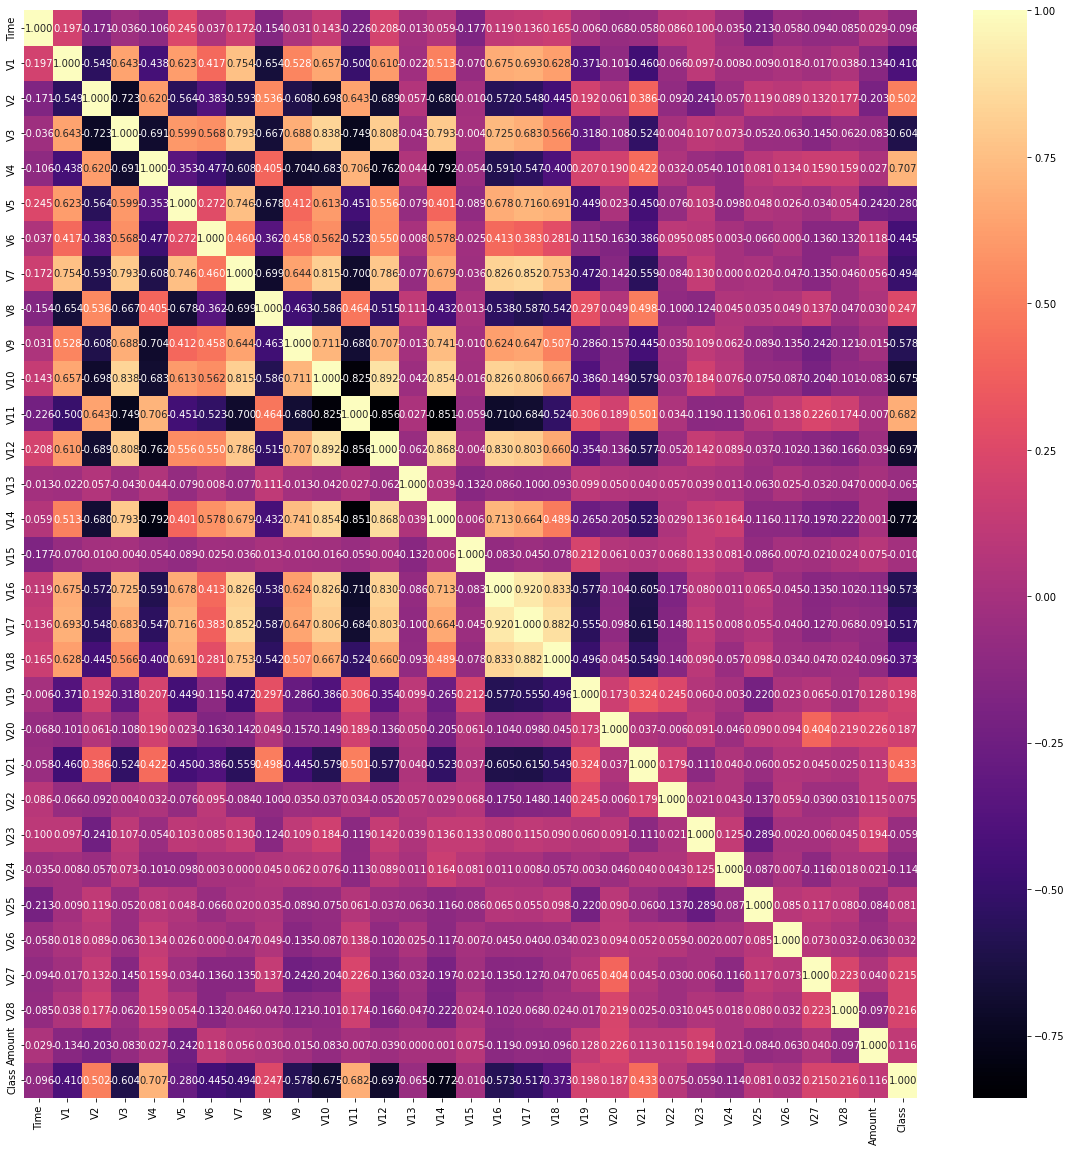

In [20]:
plt.figure(figsize = (20, 20));
sns.heatmap(df_no_outliers.corr(), cmap='magma', annot=True, fmt='.3f')
plt.show()

In [21]:
Y = df_no_outliers["Class"]
X = df_no_outliers.iloc[:,:30]

In [22]:
X

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
241803,151193.0,2.114069,-0.922541,-0.786076,-0.826107,-1.026123,-1.134000,-0.613661,-0.184060,-0.113402,...,-0.059859,-0.245532,-0.901097,0.481404,-0.107996,-0.625204,-0.684733,-0.023641,-0.041619,43.50
146521,87742.0,-2.366791,2.212334,-0.937356,-2.999015,0.293552,-0.651477,0.451191,0.896644,0.380740,...,0.412003,-0.328118,-0.876220,0.000703,0.192140,0.291939,0.376636,0.497055,0.334673,5.00
24333,33181.0,-9.407961,6.054329,-1.682685,-0.640422,-3.908803,0.958057,-2.361048,2.609326,4.771685,...,3.109723,-1.329074,-0.661838,0.131567,-0.054772,1.800772,-0.038769,2.104466,1.026797,10.00
238936,149886.0,-0.033736,0.404004,0.059294,0.427591,0.785053,0.727402,0.945472,0.023565,0.425815,...,0.016755,0.445423,1.592725,-0.068960,0.096586,-0.514080,-0.461915,0.303128,0.283453,93.85
219114,141605.0,2.060554,0.086786,-1.845130,0.213059,0.643606,-0.342546,0.060561,-0.054117,0.289000,...,-0.146299,-0.340719,-0.917429,0.283173,0.094483,-0.243277,0.178599,-0.068078,-0.045058,0.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00


In [23]:
import statsmodels.api as sma
X_new = sma.add_constant(X)
lmreg = sma.OLS(Y,X_new).fit()
lmreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Class   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                     54.60
Date:                Sun, 10 Mar 2024   Prob (F-statistic):          9.21e-168
Time:                        16:39:03   Log-Likelihood:                -114.93
No. Observations:                 795   AIC:                             291.9
Df Residuals:                     764   BIC:                             436.9
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2153      0.035      6.065      0.000       0.146       0.285
Time       -5.933e-07   3.03e-07     -1.959      0.050   -1.19e-06    1.28e-09
V1            -0.0271      0.008     -3.195      0.001      -0.044      -0.010
V2            -0.0244      0.017     -1.401      0.162      -0.059       0.010
V3            -0.0192      0.010     -1.897      0.058      -0.039       0.001
V4             0.0645      0.008      7.723      0.000       0.048       0.081
V5            -0.0063      0.016     -0.395      0.693      -0.038       0.025
V6             0.0131      0.013      1.012      0.312      -0.012       0.039
V7             0.0455      0.020      2.320      0.021       0.007       0.084
V8            -0.0614      0.012     -5.038      0.000      -0.085      -0.037
V9             0.0156      0.011      1.423      0.155      -0.006       0.037
V10           -0.0286      0.011     -2.577      0.010      -0.050      -0.007
V11            0.0138      0.011      1.261      0.208      -0.008       0.035
V12            0.0055      0.010      0.568      0.570      -0.013       0.024
V13           -0.0183      0.011     -1.732      0.084      -0.039       0.002
V14           -0.0547      0.008     -6.910      0.000      -0.070      -0.039
V15           -0.0069      0.012     -0.554      0.580      -0.031       0.018
V16           -0.0042      0.013     -0.333      0.739      -0.029       0.021
V17           -0.0054      0.009     -0.630      0.529      -0.022       0.011
V18            0.0061      0.014      0.440      0.660      -0.021       0.033
V19           -0.0088      0.012     -0.716      0.474      -0.033       0.015
V20           -0.0062      0.028     -0.225      0.822      -0.061       0.048
V21            0.0555      0.021      2.640      0.008       0.014       0.097
V22            0.0327      0.017      1.885      0.060      -0.001       0.067
V23            0.0112      0.026      0.435      0.663      -0.039       0.061
V24            0.0148      0.020      0.759      0.448      -0.024       0.053
V25           -0.0073      0.022     -0.335      0.738      -0.050       0.035
V26           -0.0756      0.024     -3.173      0.002      -0.122      -0.029
V27            0.0776      0.023      3.376      0.001       0.032       0.123
V28            0.0815      0.040      2.048      0.041       0.003       0.160
Amount       1.92e-05      0.000      0.092      0.927      -0.000       0.000
==============================================================================
Omnibus:                       97.877   Durbin-Watson:                   0.893
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              132.245
Skew:                           0.967   Prob(JB):                     1.92e-29
Kurtosis:                       3.503   Cond. No.                     4.79e+05
==

In [28]:
from sklearn.decomposition import PCA
pca = PCA()
PC = pca.fit_transform(X)
PC = pd.DataFrame(PC)
PC.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,-60148.569442,-38.782231,-4.091655,-1.877443,-0.179912,-1.819652,-0.770306,1.153811,-0.774658,0.706692,...,0.468854,-0.213710,-0.185032,0.326742,-0.153918,-0.518284,0.339586,-0.207136,-0.004998,-0.088060
1,3302.433539,-72.004939,-5.252034,-3.017690,2.670206,0.811201,-2.178695,-1.921755,0.851078,-1.945160,...,0.739442,0.334727,0.418826,-0.285582,-0.263730,0.411131,0.052976,0.052908,-0.284021,0.012830
2,57863.433017,-62.455189,-5.200743,-4.437941,8.920535,3.208759,2.509200,-4.266259,-0.513546,3.053972,...,4.971241,2.594895,-1.036545,-1.729097,-0.095526,-0.174475,0.541901,0.263650,-0.036840,-0.018754
3,-58841.573659,11.676287,-4.231508,-1.473371,-0.274027,0.332703,0.783456,-1.153713,0.933816,-0.363191,...,-0.894925,1.399787,0.459299,0.385354,-1.017437,-0.515096,-0.079680,0.025180,-0.021889,0.260467
4,-50560.565951,-80.600897,-3.773261,-0.063169,0.210449,-1.674337,-0.603215,0.801245,-0.318165,-0.250212,...,0.049455,-0.799229,0.404661,-0.112085,-0.032901,0.262336,0.074565,0.017884,0.019400,0.016928


In [29]:
var = pca.explained_variance_ratio_


array([9.99991847e-01, 8.10011743e-06, 3.72431835e-08, 4.67282166e-09,
       2.28497609e-09, 1.20415080e-09, 9.75278651e-10, 8.13748416e-10,
       6.40321970e-10, 5.37801619e-10, 5.16871038e-10, 4.79422102e-10,
       4.46401770e-10, 3.96203491e-10, 3.84237731e-10, 3.23328349e-10,
       3.22027559e-10, 2.44623383e-10, 2.31234876e-10, 1.93200910e-10,
       1.89906856e-10, 1.59997222e-10, 1.26994505e-10, 1.08152657e-10,
       1.00193780e-10, 7.58217288e-11, 6.58101682e-11, 5.88959910e-11,
       3.22385299e-11, 2.34003589e-11])

In [30]:
np.cumsum(var)

array([0.99999185, 0.99999995, 0.99999998, 0.99999999, 0.99999999,
       0.99999999, 0.99999999, 0.99999999, 0.99999999, 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ])

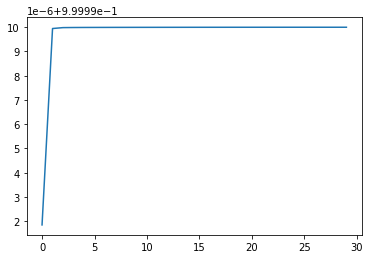

In [31]:
plt.plot(np.cumsum(var))

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA

model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.2, stratify=Y ,random_state=(42))


pca = PCA(n_components=5)

X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

model.fit(X_train_trf,Y_train)
Y_pred = model.predict(X_test_trf)

print("training",np.mean(cross_val_score(model, X_train_trf, Y_train, cv=5, scoring='accuracy')))
print("testing",np.mean(cross_val_score(model, X_test_trf, Y_test, cv=5, scoring='accuracy')))


training 0.9261687992125985
testing 0.9310483870967742


In [55]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score


model2 = LogisticRegression(multi_class='multinomial', solver='lbfgs')
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.2, stratify=Y ,random_state=(42))

model2.fit(X_train,Y_train)
Y_pred = model2.predict(X_test)

print("training",np.mean(cross_val_score(model2, X_train, Y_train, cv=5, scoring='accuracy')))
print("testing",np.mean(cross_val_score(model2, X_test, Y_test, cv=5, scoring='accuracy')))


training 0.9371555118110237
testing 0.9


In [62]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.2, stratify=Y ,random_state=(42))
RFR = RandomForestClassifier(n_estimators=100,
                      max_samples=0.4,
                      max_features=0.4)

model3 = RFR.fit(X_train,Y_train)

Y_pred_train = RFR.predict(X_train)
Y_pred_test = RFR.predict(X_test)

print("training",np.mean(cross_val_score(model3, X_train, Y_train, cv=5, scoring='accuracy')))
print("testing",np.mean(cross_val_score(model3, X_test, Y_test, cv=5, scoring='accuracy')))

training 0.9339936023622049
testing 0.9372983870967742


In [71]:
import pickle
pickle.dump(model3,open('rfrmodel.pkl','wb'))